# Titanic: Machine Learning from Disaster

** Predict survival on the Titanic and get familiar with ML basics **

## Overview
The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Data Overview

Read in with pandas

In [443]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re as re

%matplotlib inline

In [444]:
# read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

full_data = [train, test]

In [445]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [446]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


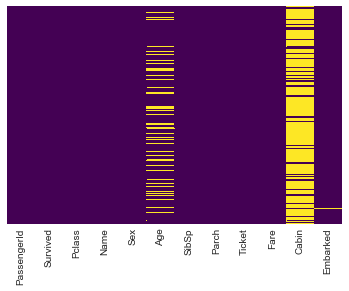

In [447]:
# We can use seaborn to create a simple heatmap to see where we are missing data!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## EDA (Exploratory Data Analysis)

Learn about the data. For each variable:
* is it categorical?
* if not, Min Max and Average value?
* if it is ... what are the categories
* are there missing values
* something about the distribution of the variable

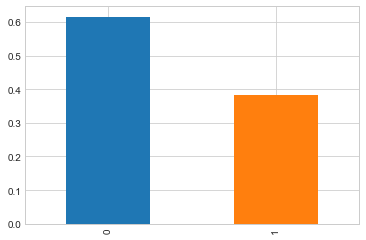

In [448]:
train['Survived'].value_counts(normalize=True).plot(kind='bar')

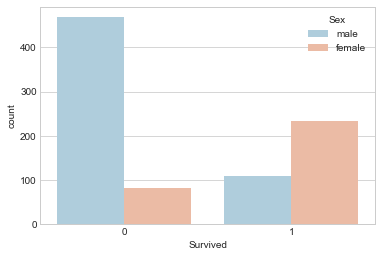

In [449]:
# check the gender VS survivals
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [450]:
# what's the overall survived rate per gender
print(train.Survived[(train.Sex == 'male')].value_counts(normalize=True))
print(train.Survived[(train.Sex == 'female')].value_counts(normalize=True))

0    0.811092
1    0.188908
Name: Survived, dtype: float64
1    0.742038
0    0.257962
Name: Survived, dtype: float64


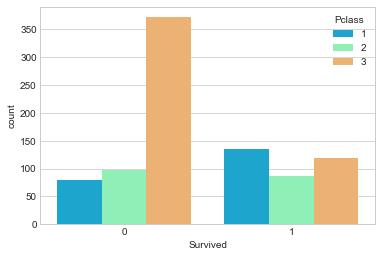

In [451]:
# how is suvivals per pclass?
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

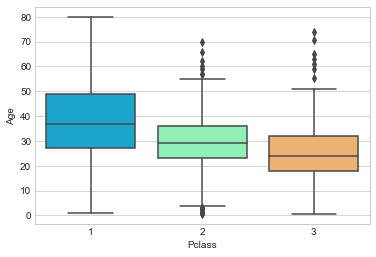

In [452]:
# Age versus class
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')

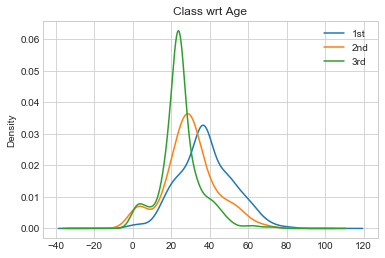

In [453]:
#plt.figure(figsize=(8, 7))
for x in [1, 2, 3]:
    df.Age[df.Pclass == x].plot(kind='kde')
plt.title('Class wrt Age')
plt.legend(("1st", "2nd", "3rd"))

Text(0.5,1,'Age wrt Survived')

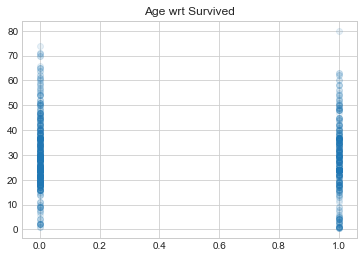

In [454]:
# Age versus survived
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title('Age wrt Survived')

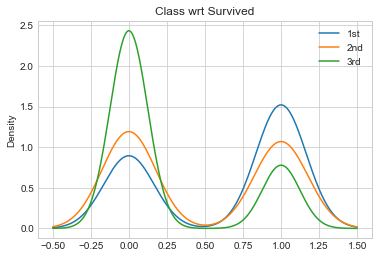

In [455]:
# Class versus survived
for x in [1, 2, 3]:
    df.Survived[df.Pclass == x].plot(kind='kde')
plt.title('Class wrt Survived')
plt.legend(("1st", "2nd", "3rd"))

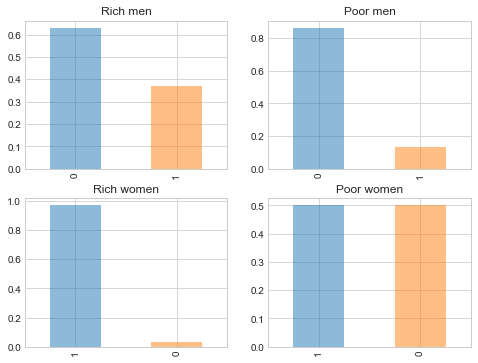

In [456]:
# Rich men Vs poor

fig, axs = plt.subplots(2,2, figsize=(8,6))
train.Survived[(train.Sex == 'male') & (train.Pclass ==1)].value_counts(normalize=True).plot(kind='bar',alpha=0.5, ax=axs[0, 0], title='Rich men')
train.Survived[(train.Sex == 'male') & (train.Pclass ==3)].value_counts(normalize=True).plot(kind='bar',alpha=0.5, ax=axs[0, 1], title='Poor men')

train.Survived[(train.Sex == 'female') & (train.Pclass ==1)].value_counts(normalize=True).plot(kind='bar',alpha=0.5, ax=axs[1, 0], title='Rich women')
train.Survived[(train.Sex == 'female') & (train.Pclass ==3)].value_counts(normalize=True).plot(kind='bar',alpha=0.5, ax=axs[1, 1], title='Poor women')


In [457]:
train.Survived[(train.Sex == 'female') & (train.Pclass ==1)].value_counts(normalize=True)

1    0.968085
0    0.031915
Name: Survived, dtype: float64

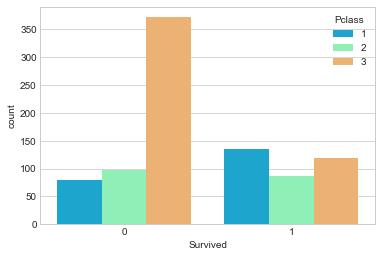

In [458]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

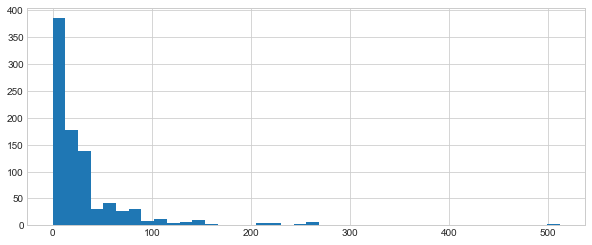

In [459]:
# hist diagram
train['Fare'].hist(bins=40,figsize=(10,4))

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



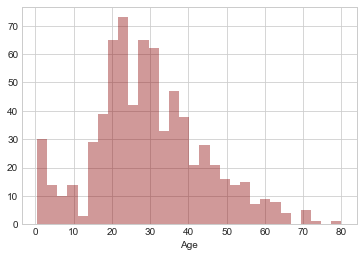

In [460]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

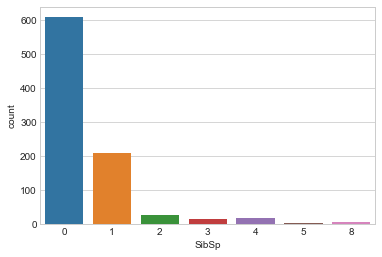

In [461]:
sns.countplot(x='SibSp',data=train)

In [462]:
# predict just with gender?

train['Hyp'] = 0
train.loc[train.Sex == "female", "Hyp"] = 1

train["Result"] = 0
train.loc[train.Survived == train['Hyp'], 'Result'] = 1

print(train["Result"].value_counts(normalize = True))

1    0.786756
0    0.213244
Name: Result, dtype: float64


## Data Cleaning

In [463]:
# find out the median age per class
print (train.Age[train.Pclass == 1].dropna().median())
print (train.Age[train.Pclass == 2].dropna().median())
print (train.Age[train.Pclass == 3].dropna().median())

37.0
29.0
24.0


In [464]:
# Apply the median age per each Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [465]:
# With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [466]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


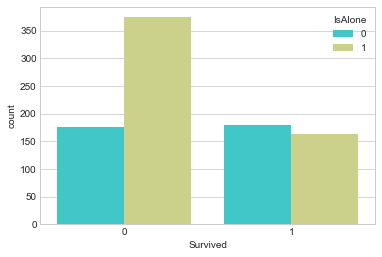

In [467]:
sns.countplot(x='Survived',hue='IsAlone',data=train,palette='rainbow')

In [468]:
# find out the median fare per class
print (train[['Fare', 'Pclass']].dropna().groupby(['Pclass'], as_index=False).mean())

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


In [469]:
# Apply the median fare to the data
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        if Pclass == 1:
            return 84.1

        elif Pclass == 2:
            return 20.7

        else:
            return 12.7

    else:
        return Fare
    
train['Fare'] = train[['Fare','Pclass']].apply(impute_fare,axis=1)
test['Fare'] = test[['Fare','Pclass']].apply(impute_fare,axis=1)

In [470]:
# check titles
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [471]:
# categorize the title
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Major', 'Rev', 'Dr' 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0      Dr  0.428571
1  Master  0.575000
2    Miss  0.702703
3      Mr  0.156673
4     Mrs  0.793651
5    Rare  0.266667
6     Sir  1.000000


In [472]:
print(train.Survived[(train.Title == 'Dr')].value_counts(normalize=True))

0    0.571429
1    0.428571
Name: Survived, dtype: float64


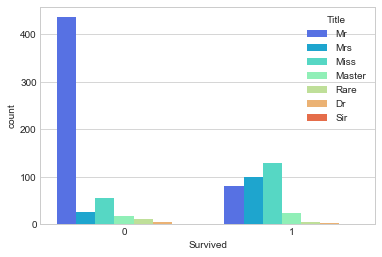

In [473]:
# Check the correlation between title and survivle
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Title',data=train,palette='rainbow')

In [474]:
# how is the gender with title of "Master"? (All male)
train.Sex[(train.Title == 'Master') ].value_counts()

male    40
Name: Sex, dtype: int64

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


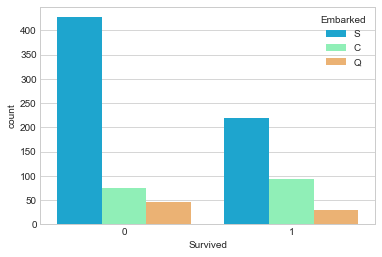

In [475]:
# the embarked feature has some missing value. and we try to fill those with the most occurred value ( 'S' ).
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
sns.countplot(x='Survived',hue='Embarked',data=train,palette='rainbow')

In [476]:

for dataset in full_data:
    # create a new column and catigorize fare
    dataset['FareCat'] = 0
    dataset.loc[ dataset['Fare'] <= 7.91, 'FareCat'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'FareCat'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'FareCat'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'FareCat'] = 3
    dataset['FareCat'] = dataset['FareCat'].astype(int)
    
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Age
    dataset['AgeCat'] = 0
    dataset.loc[ dataset['Age'] <= 16, 'AgeCat'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'AgeCat'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'AgeCat'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'AgeCat'] = 3
    dataset.loc[ dataset['Age'] > 64, 'AgeCat']                           = 4

     # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [477]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result,FamilySize,IsAlone,Title,FareCat,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,2,0,1.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,1,1,2,0,3.0,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,1,1,2.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1,1,2,0,3.0,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,1,1,1.0,1,2


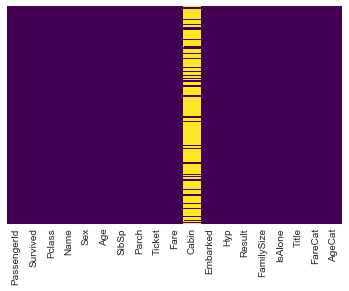

In [478]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [479]:
train_sety = train['Survived']

def feature_X(dataset, method):
    if method == 1:
        feature_columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone']
        train_setX = dataset[feature_columns]
    elif method == 2:
        feature_columns = ['Pclass', 'Sex', 'AgeCat', 'FareCat', 'Embarked', 'Title', 'IsAlone']
        train_setX = dataset[feature_columns]
    else :
        feature_columns = ['Pclass','AgeCat', 'FareCat','Title', 'IsAlone']
        train_setX = dataset[feature_columns]
        
        sex = pd.get_dummies(dataset['Sex'],drop_first=True)
        embark = pd.get_dummies(dataset['Embarked'],drop_first=True)
        train_setX = pd.concat([train_setX,sex,embark],axis=1)
    
    return train_setX

In [480]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareCat,AgeCat
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2,1,1,1.0,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,2,0,3.0,0,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2,1,1,1.0,1,3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,1,1,1.0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,3,0,3.0,1,1


In [481]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

def ml_evaluator(method):
    classifiers = [
        KNeighborsClassifier(3),
        SVC(probability=True),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        LogisticRegression()]

    log_cols = ["Classifier", "Accuracy"]
    log  = pd.DataFrame(columns=log_cols)

    train_setX = feature_X(train, method)
    
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(train_setX, 
                                                        train_sety, test_size=0.30, 
                                                        random_state=101)

    acc_dict = {}


    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

    for clf in acc_dict:
        acc_dict[clf] = acc_dict[clf] / 10.0
        log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
        log = log.append(log_entry)

    plt.xlabel('Accuracy')
    plt.title('Classifier Accuracy')

    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")


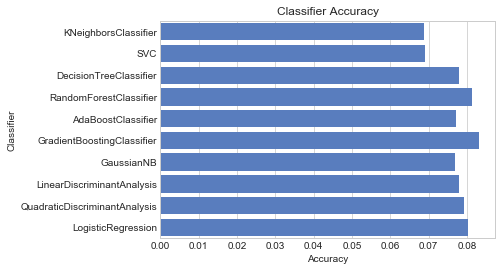

In [482]:
ml_evaluator(1)

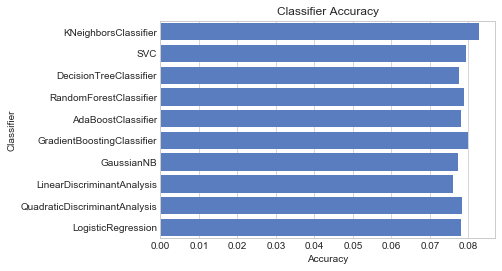

In [483]:
ml_evaluator(2)

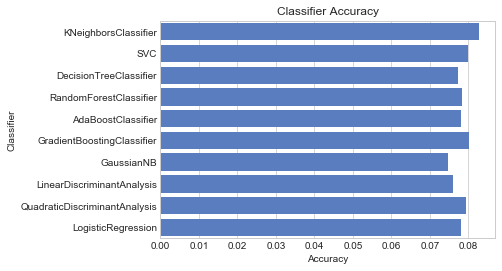

In [484]:
ml_evaluator(3)

In [485]:
candidate_classifier = GradientBoostingClassifier()
train_setX = feature_X(train, 1)
candidate_classifier.fit(train_setX, train_sety)

test_setX = feature_X(test, 1)
predictions = candidate_classifier.predict(test_setX)

In [486]:
# Generate Submission File 
PassengerId = test['PassengerId']
StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
StackingSubmission.to_csv("StackingSubmission.csv", index=False)

In [487]:
train_setX = feature_X(train, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_setX, 
                                                    train_sety, test_size=0.30, 
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel_ = logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print(logmodel_.score(X_train,y_train))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84       154
          1       0.81      0.69      0.75       114

avg / total       0.80      0.80      0.80       268

0.8105939004815409


In [488]:
from sklearn import preprocessing

train_setX = feature_X(train, 1)

poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(train_setX)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, 
                                                    train_sety, test_size=0.30, 
                                                    random_state=101)


logmodel = LogisticRegression()
logmodel_ = logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print(logmodel_.score(X_train,y_train))

             precision    recall  f1-score   support

          0       0.78      0.90      0.83       154
          1       0.83      0.65      0.73       114

avg / total       0.80      0.79      0.79       268

0.8362760834670947
